# ARIMA Model for Stock Price Prediction

This script creates an ARIMA model to predict historical closing prices of the companies, and then uses an auto_arima model to automatically select hyperparameters and predict closing prices for the next 6 months.

# Gather DataFrames from CSVs

In [1]:
import pandas as pd

data_dir = '../DATA'
google = pd.read_csv(data_dir + '/Alphabet_Google.csv')
apple = pd.read_csv(data_dir + '/Apple.csv')
meta = pd.read_csv(data_dir + '/Meta Platforms.csv')
microsoft = pd.read_csv(data_dir + '/Microsoft.csv')
nvidia = pd.read_csv(data_dir + '/NVIDIA.csv')

# Preprocess the Data

In [2]:
def preprocess_data(company):
    company = company.reset_index()
    company['Date'] = pd.to_datetime(company['Date'])
    company.set_index('Date', inplace=True)
    company = company['Close'].to_frame()

    return company

In [3]:
companies = {}
companies['Google'] = {'data': preprocess_data(google)}
companies['Apple'] = {'data': preprocess_data(apple)}
companies['Meta'] = {'data': preprocess_data(meta)}
companies['Microsoft'] = {'data': preprocess_data(microsoft)}
companies['NVIDIA'] = {'data': preprocess_data(nvidia)}

# Build the ARIMA Models for each Company

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

def arima_forecast(history):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit() 
    output = model_fit.forecast()
    yhat = output[0]
    return yhat #return predictions

def plot_predictions(name, dates, size, test, predictions):
    plt.plot(dates, test, label='Real')
    plt.plot(dates, predictions, color='red', label='Predicted')
    plt.title(name + ' ARIMA Predictions vs Actual Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

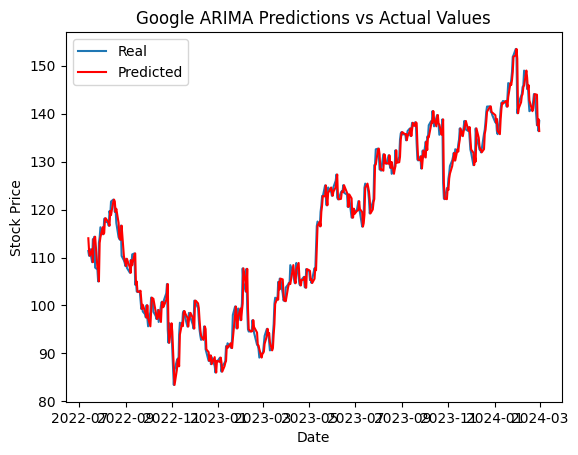

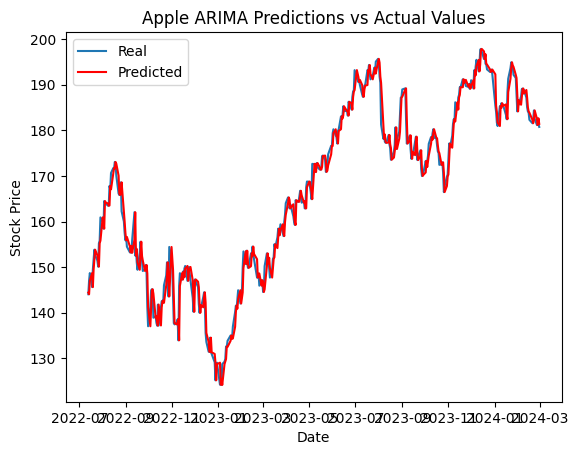

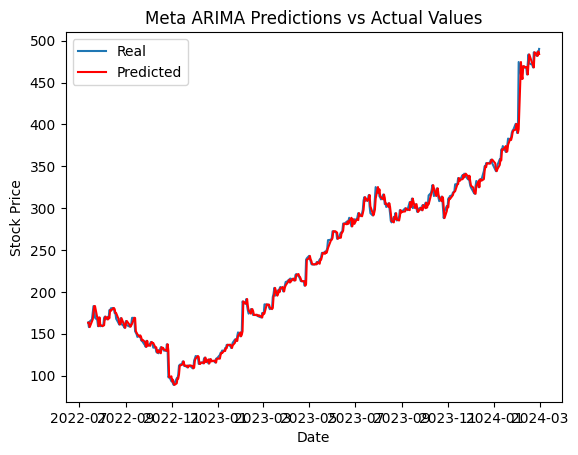

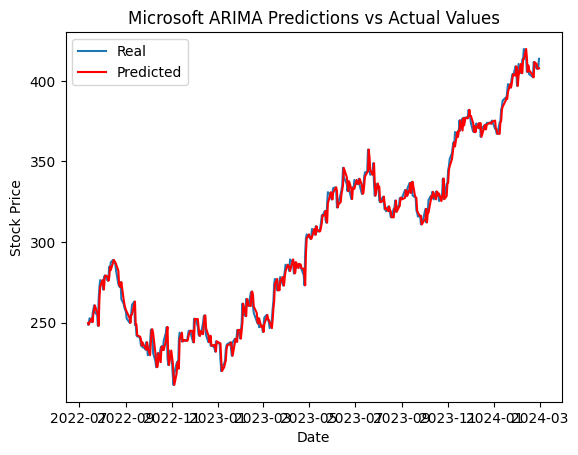

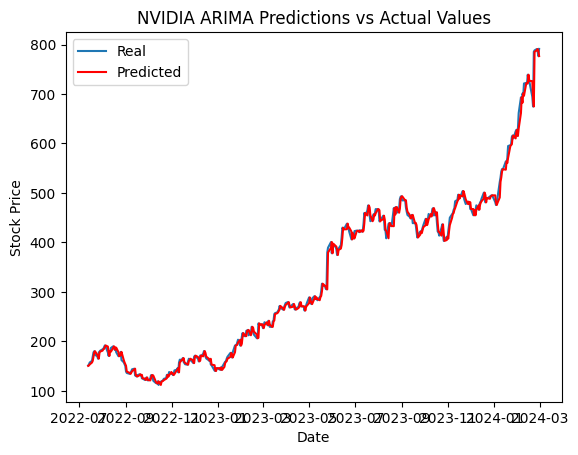

In [5]:
companies_history = {}

#create train and test set
for name, company in companies.items():
    X = company['data'].values
    #sklearn does have a train_test_split function, but we want to do it sequentially to save indices for graphing
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:len(X)]    

    history = [x for x in train]
    predictions = list()

    for i in range(len(test)):
        yhat = arima_forecast(history)
        predictions.append(yhat)
        obs = test[i]
        history.append(obs)

    companies_history[name] = {'history': history}
    plot_predictions(name, company['data'].iloc[train_size:,:].index, train_size, test, predictions)

# Looks pretty accurate with historical data, let's see how it performs with future predictions

In [8]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.6/654.6 kB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.7 MB/s eta 0:00:0000:0100:01


In [6]:
from pmdarima.arima import auto_arima

def future_forecast(history, months):
    model = auto_arima(history)
    #model_fit = model.fit() 
    #output = model_fit.forecast(steps = months)
    output = model.predict(n_periods = months)
    return output, model #return predictions

def plot_future_forecast(name, months, predictions):
    plt.figure(figsize=(12, 6))
    plt.plot(months, predictions, color='red', label='Future Predictions')
    plt.title(name + ' Future Stock Price Predictions using ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Identify the best hyperparameters using Auto ARIMA

In [7]:

# Assuming 'dates' is a pandas DateTimeIndex or similar
# and you have datetime objects to work with
def extend_dates(dates, periods):
    last_date = dates[-1]
    future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')
    return future_dates

# Adjust your plotting function to handle future dates correctly
def plot_predictions(name, dates, size, test, predictions, future_predictions):
    plt.figure(figsize=(14, 7))

    # Historical data plotting
    plt.plot(dates[:size], test[:size], label='Historical')

    # Adjusted for future predictions plotting
    # Generate or ensure future dates are correctly aligned with future predictions
    future_dates = extend_dates(dates[:size], len(future_predictions))
    
    # Ensure this check or generate a correct future_dates list as needed
    if len(future_predictions) > 0:
        plt.scatter(future_dates, future_predictions, color='green', label='Future', marker='o')
    
    plt.title(f'{name} ARIMA Predictions vs Actual Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




Google :  [138.67105112 138.8572743  139.02249332 139.16993826 139.30234244
 139.42201887 139.53092485 139.63071669 139.72279598 139.80834877
 139.88837873 139.96373516 140.03513677 140.10319175 140.16841475
 140.23124126 140.29203984 140.35112235 140.40875267 140.46515414
 140.52051573 140.57499735 140.62873433 140.68184118 140.7344148
 140.7865372  140.83827776 140.88969521 140.94083923 140.99175187
 141.04246872 141.09301988 141.14343083 141.19372314 141.24391505
 141.29402199 141.34405704 141.39403126 141.44395399 141.49383315
 141.54367545 141.59348656 141.64327126 141.69303362 141.74277708
 141.79250455 141.84221847 141.89192094 141.94161372 141.9912983
 142.04097593 142.09064769 142.14031448 142.18997706 142.23963608
 142.28929209]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_1161/2846335314.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


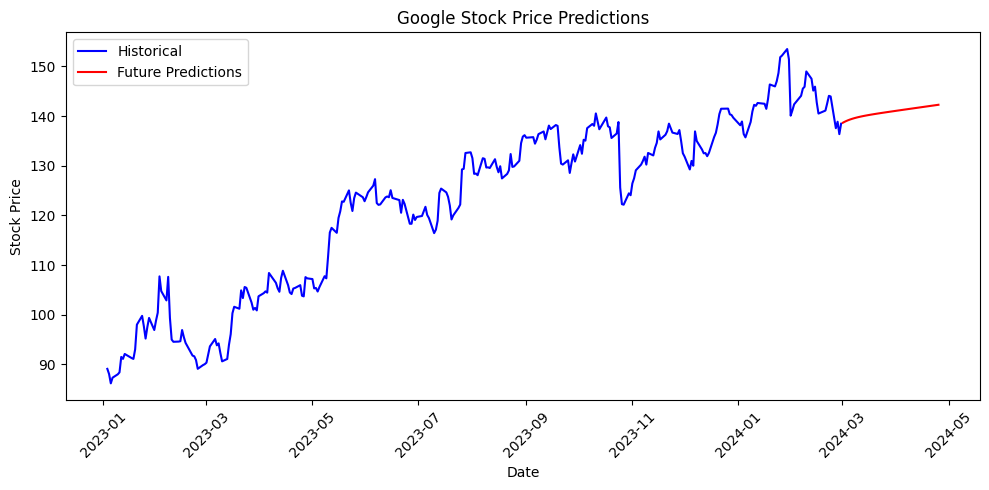

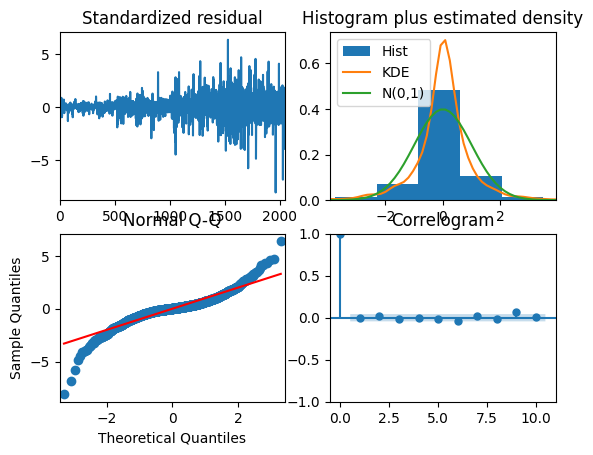

Apple :  [180.7094773  180.88834815 180.87241002 181.00460814 181.05145776
 181.11245751 181.23041982 181.228672   181.39391309 181.36548457
 181.53420267 181.52534077 181.65428834 181.70027743 181.76604848
 181.87597959 181.88450821 182.03847904 182.0209779  182.18037571
 182.17818074 182.30382655 182.34944965 182.41912251 182.52215647
 182.53970144 182.68363834 182.67599542 182.8268545  182.83091651
 182.95326019 182.99891796 183.0717481  183.16887824 183.19431915
 183.32933602 183.3305735  183.47362502 183.48353862 183.60262051
 183.64863347 183.72398561 183.81608032 183.84842249 183.97552139
 183.98474669 184.12067248 184.13604088 184.25193346 184.29855398
 184.3758882  184.46370507 184.50206677 184.62214788 184.63854766
 184.7679816 ]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_1161/2846335314.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


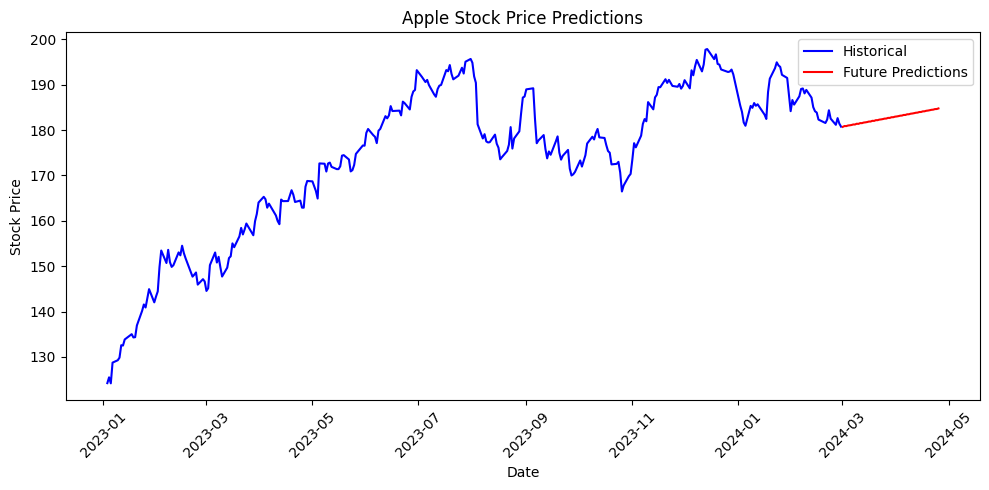

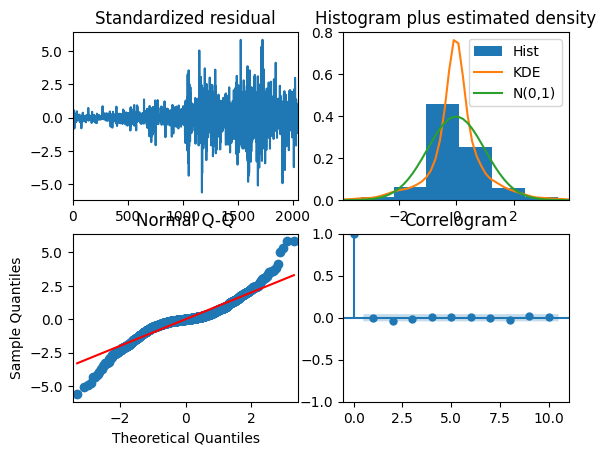

Meta :  [489.98657167 489.97532687 490.04367932 490.15996124 490.30510389
 490.46762503 490.64061063 490.81989739 491.00297841 491.18834413
 491.37508559 491.56265545 491.75072413 491.93909317 492.12764308
 492.3163019  492.50502629 492.69379018 492.88257784 493.07137982
 493.26019042 493.44900621 493.63782513 493.82664593 494.01546786
 494.20429048 494.3931135  494.58193678 494.7707602  494.95958371
 495.14840728 495.33723088 495.5260545  495.71487813 495.90370177
 496.09252541 496.28134906 496.4701727  496.65899635 496.84782
 497.03664365 497.2254673  497.41429095 497.6031146  497.79193824
 497.98076189 498.16958554 498.35840919 498.54723284 498.73605649
 498.92488014 499.11370379 499.30252744 499.49135109 499.68017473
 499.86899838]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_1161/2846335314.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


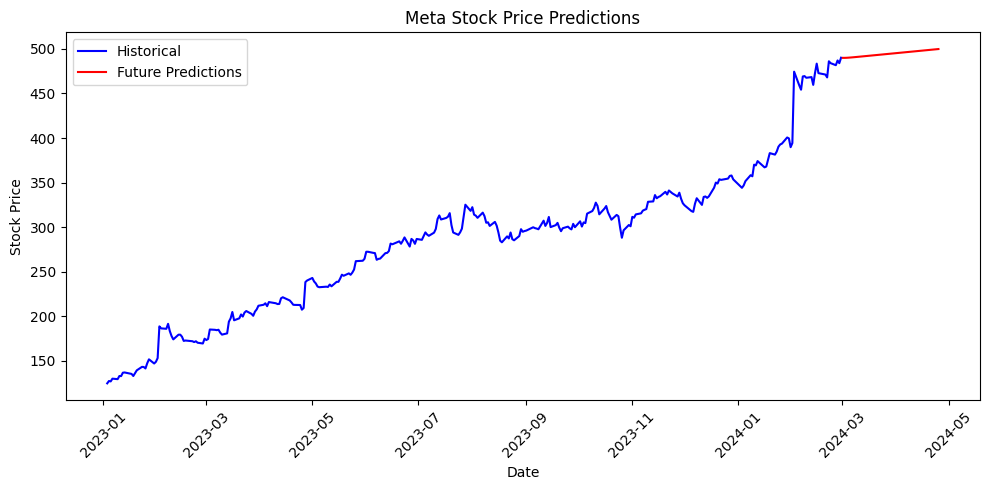

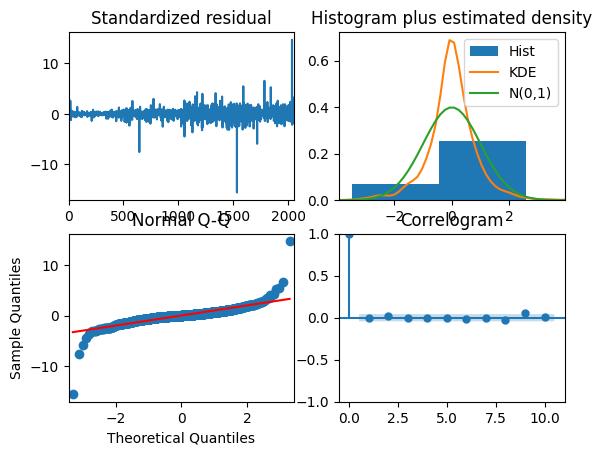

Microsoft :  [413.20880751 413.20699059 413.33167089 413.49361693 413.66654137
 413.84270001 414.01981144 414.19720356 414.37467836 414.55217753
 414.72968388 414.90719234 415.08470142 415.26221068 415.43972
 415.61722934 415.79473868 415.97224802 416.14975736 416.3272667
 416.50477604 416.68228538 416.85979472 417.03730407 417.21481341
 417.39232275 417.56983209 417.74734143 417.92485077 418.10236012
 418.27986946 418.4573788  418.63488814 418.81239748 418.98990682
 419.16741617 419.34492551 419.52243485 419.69994419 419.87745353
 420.05496287 420.23247222 420.40998156 420.5874909  420.76500024
 420.94250958 421.12001892 421.29752827 421.47503761 421.65254695
 421.83005629 422.00756563 422.18507497 422.36258432 422.54009366
 422.717603  ]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_1161/2846335314.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


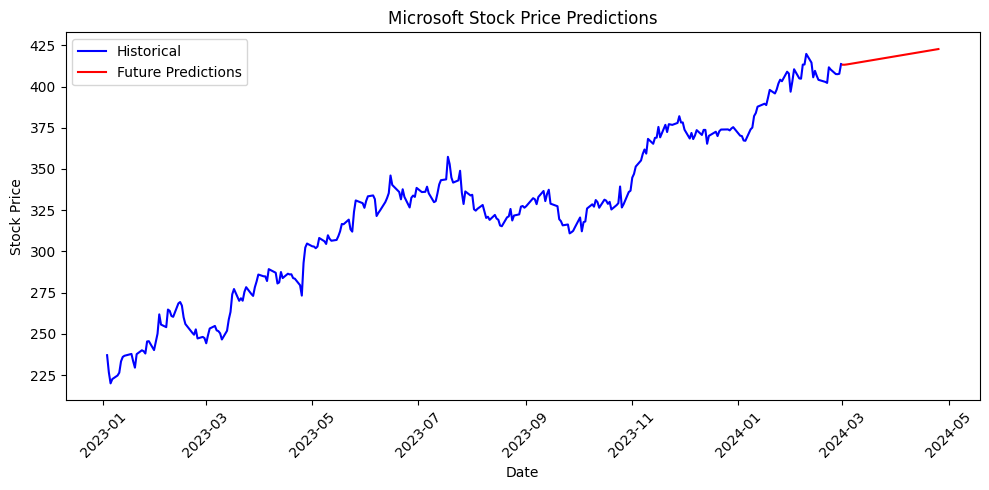

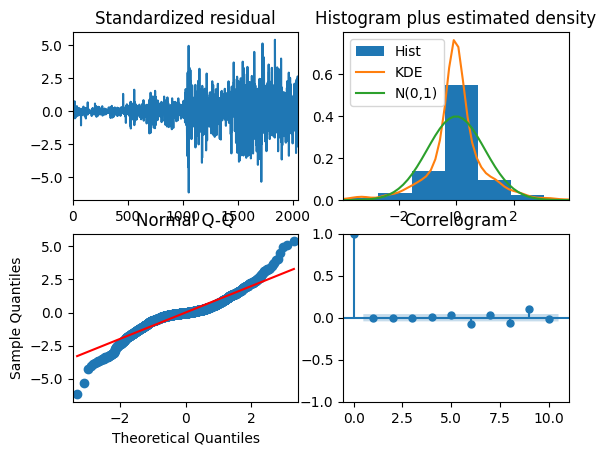

NVIDIA :  [ 795.54459372  799.56707897  803.03978672  804.90784651  809.76356383
  813.71059475  817.56856761  821.41496333  824.98107605  828.89083007
  832.72462421  836.54400336  840.3707917   844.15533036  847.97780456
  851.79475368  855.60948928  859.4263502   863.23737971  867.05242659
  870.86719124  874.68161876  878.49645934  882.31054416  886.12503541
  889.93953265  893.75397867  897.56849295  901.38291409  905.19737413
  909.01183904  912.82629625  916.6407637   920.45522016  924.26968007
  928.084141    931.8986008   935.71306202  939.52752201  943.34198226
  947.15644269  950.97090295  954.78536339  958.59982371  962.41428404
  966.2287444   970.04320473  973.85766508  977.67212543  981.48658577
  985.30104612  989.11550646  992.92996681  996.74442715 1000.5588875
 1004.37334784]


/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_1161/2846335314.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=periods+1, closed='right')


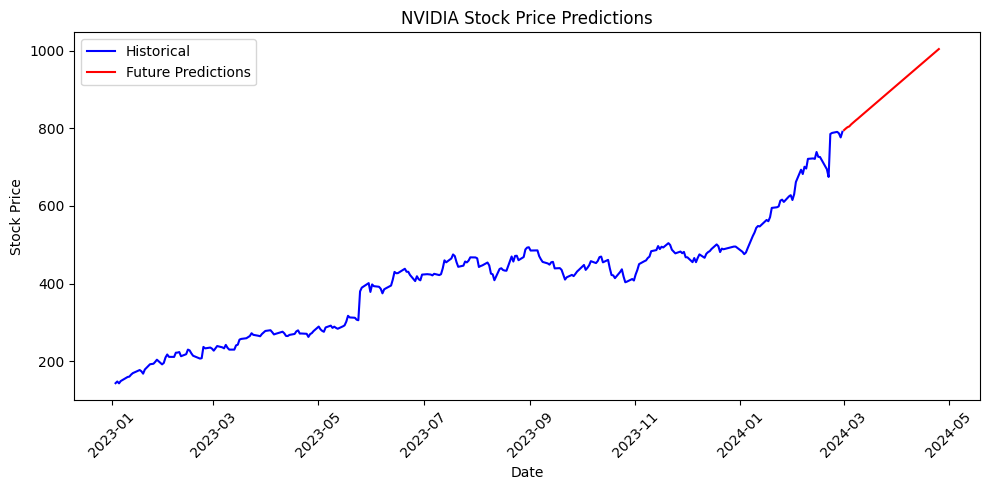

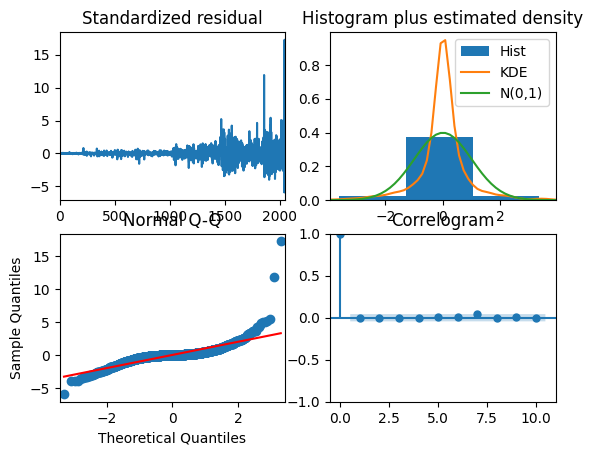

In [9]:
for name, company in companies.items():
    X = company['data'].values
    history = companies_history[name]['history']
    future_predictions, model = future_forecast(history, 56)
    print(name, ": ", future_predictions)
    
    # Convert index to DatetimeIndex to access .year attribute
    datetime_index = pd.to_datetime(company['data'].index, utc=True)
    
    # Extend the date range for future predictions
    dates = extend_dates(datetime_index, 56)
    
    # Filter historical values and dates from 2022 onwards
    historical_filter = datetime_index.year >= 2023
    historical_values = X[historical_filter]
    historical_dates = datetime_index[historical_filter]
    
    # Plot historical values from 2022 onwards
    plt.figure(figsize=(10, 5))
    plt.plot(historical_dates, historical_values, label='Historical', color='blue')
    
    # Ensure future dates are properly aligned with future_predictions for plotting
    if len(future_predictions) == len(dates):
        plt.plot(dates, future_predictions, label='Future Predictions', color='red')
    else:
        print("Error: Mismatch in length of future predictions and dates.")
    
    plt.title(f'{name} Stock Price Predictions')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # plot standardized residuals
    model.plot_diagnostics()
    plt.show()






In [ ]:
# look at plot of standardized residuals, ACF of residuals, Normal Q-Q plot, and p values for Ljung-box statistic
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

for name, company in companies.items():
    model = ARIMA(company['data']['Close'], order=(0,1,0))
    model_fit = model.fit()

    residuals = model_fit.resid
    plot_acf(residuals, lags=40)
    plt.show()

    qqplot(residuals, line='s')
    plt.show()

    lbvalue, pvalue = acorr_ljungbox(residuals, lags=10)
    print(pvalue)


In [14]:
# generate pearson corrleation matrix between all future predictions of the companies to determine if there is a bubble
# in the tech industry
future_predictions = {}
for name, company in companies.items():
    X = company['data'].values
    history = companies_history[name]['history']
    future_predictions[name], model = future_forecast(history, 56)

future_predictions_df = pd.DataFrame(future_predictions)
correlation_matrix = future_predictions_df.corr()
correlation_matrix

,Google,Apple,Meta,Microsoft,NVIDIA
Google,1.000000,0.989260,0.985968,0.988090,0.989006
Apple,0.989260,1.000000,0.999305,0.999547,0.999647
Meta,0.985968,0.999305,1.000000,0.999903,0.999769
Microsoft,0.988090,0.999547,0.999903,1.000000,0.999953
NVIDIA,0.989006,0.999647,0.999769,0.999953,1.000000


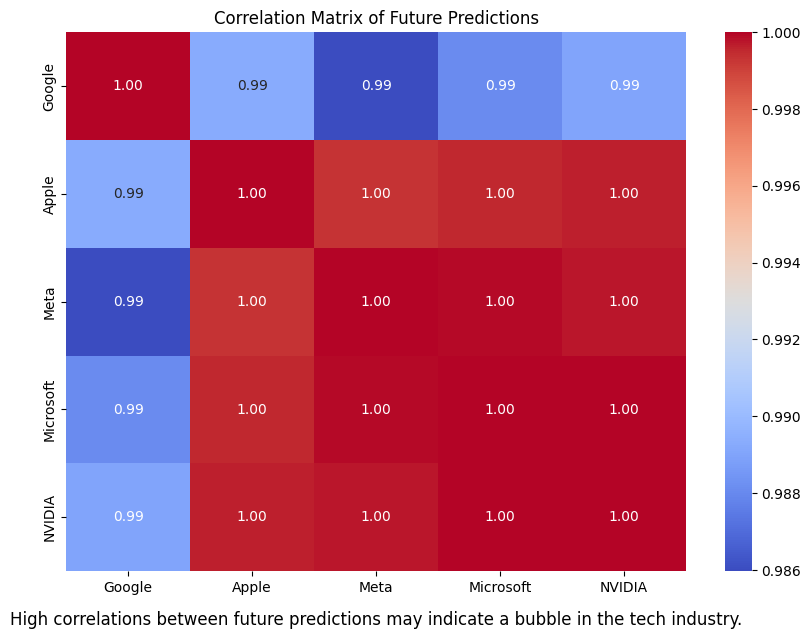

In [15]:
# show this graphically
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Future Predictions')
plt.text(0.5, -0.1, 'High correlations between future predictions may indicate a bubble in the tech industry.', 
         horizontalalignment='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()

### Calculating greatest increase from 04/01/2024 - 06/01/2024

1.5251516033028263
Google stock price is predicted to increase by 1.53% from last month to the last future predicted month
-0.36930778067883363
Apple stock price is predicted to increase by -0.37% from last month to the last future predicted month
1.2623478384831825
Meta stock price is predicted to increase by 1.26% from last month to the last future predicted month
1.4519801358800177
Microsoft stock price is predicted to increase by 1.45% from last month to the last future predicted month
1.8657531384913
NVIDIA stock price is predicted to increase by 1.87% from last month to the last future predicted month


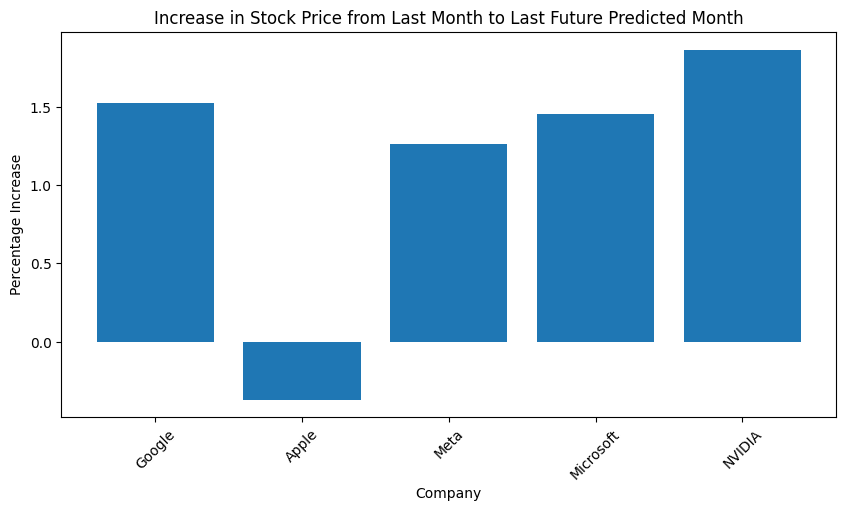

In [18]:
#calculate the increase in stock price from last month to last future predicted month
company_dict = {}
for name, company in companies_history.items():
    increase = ((company['history'][-1] - company['history'][-2]) / company['history'][-2] * 100)[0]
    print(increase)
    print(name + ' stock price is predicted to increase by ' + str(round(increase, 2)) + '% from last month to the last future predicted month')
    company_dict[name] = increase

# Show company_dict in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(company_dict.keys(), company_dict.values())
plt.title('Increase in Stock Price from Last Month to Last Future Predicted Month')
plt.xlabel('Company')
plt.ylabel('Percentage Increase')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
    